In [1]:
import json
from fastai2.basics import *
from fastai2.text.all import *

from fastai2_utils.pytorch.model import *

from text_to_img.data_coco import *
from text_to_img.model import *
from text_to_img.loss import *
from text_to_img.learner import *

In [2]:
from fastai2.vision.gan import *

In [3]:
# all_skip

# Train Gan
>

In [5]:
pretrained_lm_path = Path('./coco_small/awd_lstm-1.pt')
pretrained_vocab_path = Path('./coco_small/vocab.json')

## Datasets and DataLoaders

In [6]:
vocab = json.loads(pretrained_vocab_path.read_text())

In [7]:
dsets = get_small_gen_dsets(vocab, pct=0.0005)
len(dsets)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '/root/data/coco/annotations/captions_val2014.json'

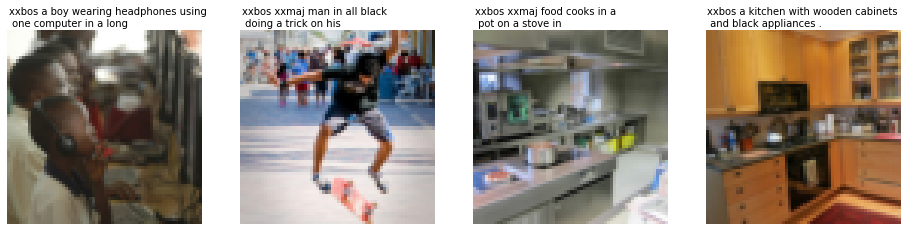

In [9]:
dls = get_gen_dls(dsets, bs=16, size=64)
dls.show_batch(max_n=4)

## Model

In [7]:
enc_out_size=1024
dec_out_size=64 
num_dec_layers=3

In [7]:
%xdel encoder
%xdel decoder
%xdel generator
encoder = Encoder.from_pretrained(pretrained_lm_path, pretrained_vocab_path, enc_out_size)
decoder = Decoder(dec_out_size, enc_out_size, num_dec_layers)
generator = MGenerator(encoder, decoder)

NameError: name 'encoder' is not defined
NameError: name 'decoder' is not defined
NameError: name 'generator' is not defined


In [35]:
%xdel encoder
%xdel decoder
%xdel generator
encoder = Encoder.from_pretrained(pretrained_lm_path, pretrained_vocab_path, enc_out_size)
decoder = basic_generator(dec_out_size, 3, enc_out_size)
generator = MGenerator(encoder, decoder)
%xdel critic
critic = basic_critic(dec_out_size, 3)

## Learner and Train

In [13]:
dsets = get_small_gen_dsets(vocab)

loading annotations into memory...
Done (t=1.14s)
creating index...
index created!


### Train on 64px

In [36]:
%xdel dls
%xdel gen_learn
%xdel crit_learn
%xdel gan_learn
dls = get_gen_dls(dsets, bs=4, size=64)
# learn = Learner(dls, generator, loss_func=L1LossFlat(), opt_func=Adam).to_fp16()
gen_learn = get_generator_learner(dls, generator)
crit_learn = get_critic_learner(dls, critic)
# gan_learn = GANLearner.from_learners(gen_learn, crit_learn, opt_func=RMSProp)
gan_learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [37]:
gan_learn.fit_one_cycle(20, 2e-4, wd=0.)

RuntimeError: you can only change requires_grad flags of leaf variables. If you want to use a computed variable in a subgraph that doesn't require differentiation use var_no_grad = var.detach().

In [ ]:
learn.show_results(0, max_n=4)

In [17]:
set_freeze_model(generator, False)

RuntimeError: you can only change requires_grad flags of leaf variables. If you want to use a computed variable in a subgraph that doesn't require differentiation use var_no_grad = var.detach().

In [38]:
set_requires_grad([generator], False)

RuntimeError: you can only change requires_grad flags of leaf variables. If you want to use a computed variable in a subgraph that doesn't require differentiation use var_no_grad = var.detach().